In [67]:
from src import util
from src import plotting

import numpy as np
import matplotlib.pyplot as plt

# %matplotlib qt
%matplotlib inline
%config InlineBackend.figure_format='retina'


In [68]:
file = "/Users/simonblaue/ownCloud - simonalvar.blaue@stud.uni-goettingen.de@owncloud.gwdg.de/masterarbeit/artifical_data/data1.dat"

In [69]:
data_gt = np.loadtxt(file)

In [70]:
from interacting_dmps_david_wode.source_code.parameters import *

start_point_1 = data_gt[0]
goal_point_1 = data_gt[-1]


agent = agent(start_point_1, goal_point_1, [1,1,1])

In [87]:
agent.learn_trajectory(file, num_kernels=20)

Start Learning...
|████████████████████████████████████████| 200/200 [100%] in 3.8s (52.40/s) 


In [88]:
data_david = agent.pos

In [97]:
data_dmp = np.loadtxt("/Users/simonblaue/ownCloud - simonalvar.blaue@stud.uni-goettingen.de@owncloud.gwdg.de/masterarbeit/artifical_data/data1_dmp.dat")

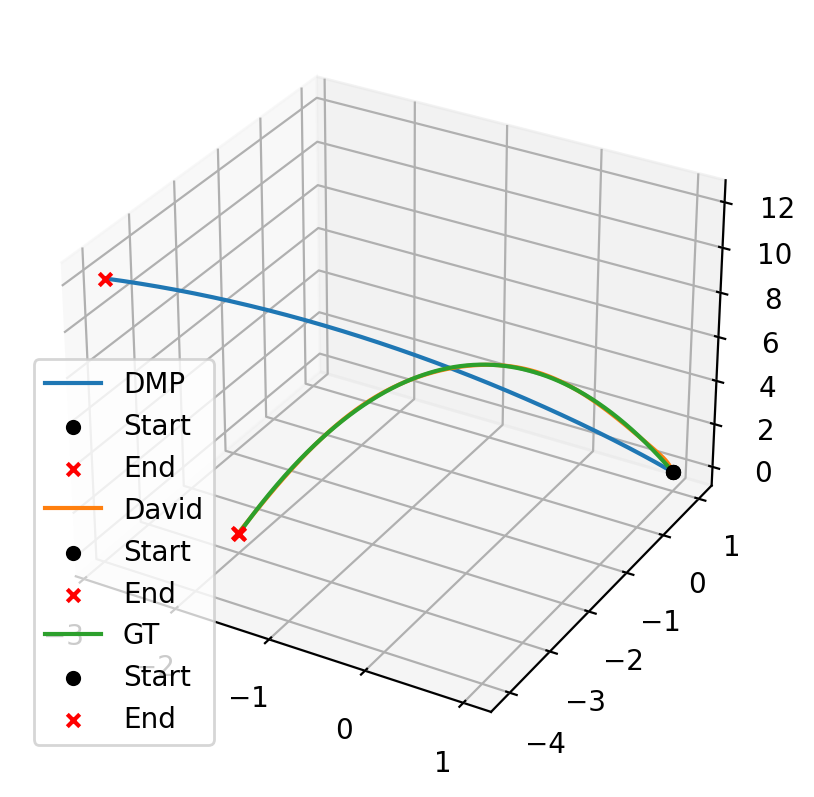

In [98]:
plotting.trj_3d([data_dmp, data_david, data_gt], ["DMP", "David", "GT"], legend=True)

In [99]:
data_dmp

array([[ 1.000000e+00,  1.000000e+00,  0.000000e+00],
       [ 9.999228e-01,  9.998969e-01,  3.752951e-04],
       [ 9.997685e-01,  9.996913e-01,  1.123071e-03],
       ...,
       [-2.795701e+00, -4.060911e+00,  1.204734e+01],
       [-2.804141e+00, -4.072164e+00,  1.206220e+01],
       [-2.812572e+00, -4.083406e+00,  1.207698e+01]])

In [100]:
data_gt

array([[ 1.    ,  1.    ,  0.    ],
       [ 0.994 ,  0.992 ,  0.0499],
       [ 0.988 ,  0.984 ,  0.0996],
       ...,
       [-1.988 , -2.984 ,  0.0996],
       [-1.994 , -2.992 ,  0.0499],
       [-2.    , -3.    ,  0.    ]])

In [101]:
data_david

array([[ 1.        ,  1.        ,  0.        ],
       [ 0.99720888,  0.99627851,  0.0400032 ],
       [ 0.99270106,  0.99026808,  0.10104375],
       ...,
       [-1.98816141, -2.98421522,  0.13734696],
       [-1.9941741 , -2.99223213,  0.09169368],
       [-2.00018689, -3.00024919,  0.04597034]])

In [6]:
curve1 = util.artificial_grabing_data(np.array([1,1,0]), np.array([-0.5, -1, 0]))
curve2 = util.artificial_grabing_data(np.array([-0.5, 5, 0]), np.array([1, 1, 0]))

np.savetxt("artifical_data/data1.dat", curve1, delimiter='  ')
np.savetxt("artifical_data/data2.dat", curve2, delimiter='  ')

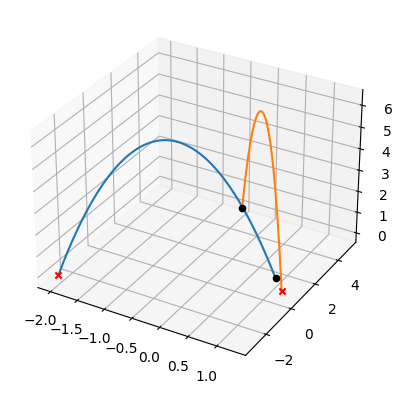

In [7]:
plotting.trj_3d([curve1, curve2], ["Player 1", "Player 2"])